### Notebook initialisation


In [ ]:
# install qiskit
!pip install qiskit --quiet

# necessary imports
import qiskit
import numpy as np
import requests
import os
import json

# current Quokka address:
req_str_qasm = 'http://quokka1.quokkacomputing.com/qsim/qasm'

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 8.4 MB/s eta 0:00:00


#**Introduction to Quantum Computing* 


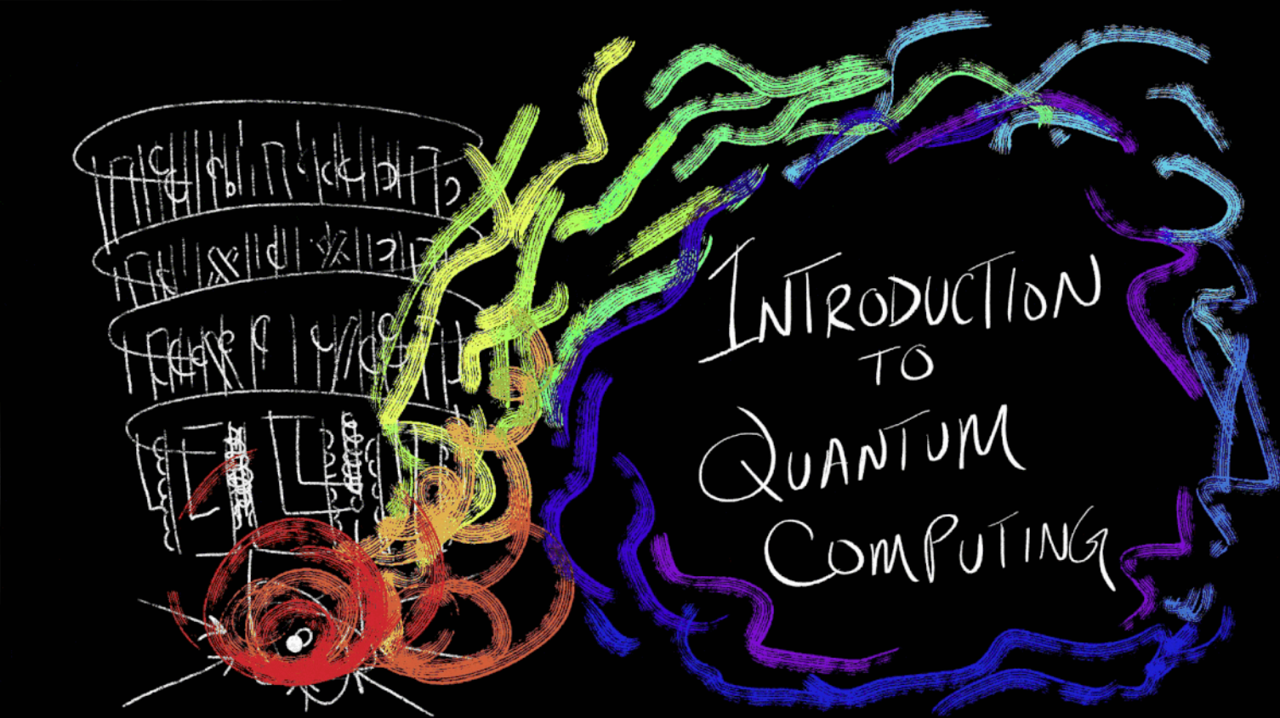

Welcome to Introduction to Quantum Computing. **This is Lecture 5**.

---
**What did you learn last week?**

In the last few weeks you completed your basic training. You now know about quantum information, how to write it, how to read it, and how to dial it up to 11 with entanglement. Entangled states were those that could not be written as product states (in any basis!). With multi-qubit states and gates, you have all the tools you need to start creating quantum algorithms.

**What will you learn this week?**

But not so fast! Most quantum algorithms use a standard toolset. This week you will fill your tool box with the canonical gate set and learn how to quickly recognise their utility and tricks for working with them. At the end of the week, you’ll have a complete “cheat sheet” that you’ll be able to refer to when we analyse the first practical quantum protocols.




**What will you be able to do at the end of this week?**

At the end of this module, you should be able to answer these questions:
* *Which are the canonical single qubit gates?*
* *Which sets of gates are not useful?*
* *How do I create most two qubit gates from one?*
* *Three qubit gates… and beyond?*
* *How do I analyse a quantum circuit?*

---

#Models of quantum computation?

Wait. What? *Models* of quantum computation — there are more than one? Yes!

There is the adiabatic model — a continuous time model which encodes information in the lowest energy state of a system that can be gotten at by very slowly changing the system from a simple one to the (presumably) more complicated one.

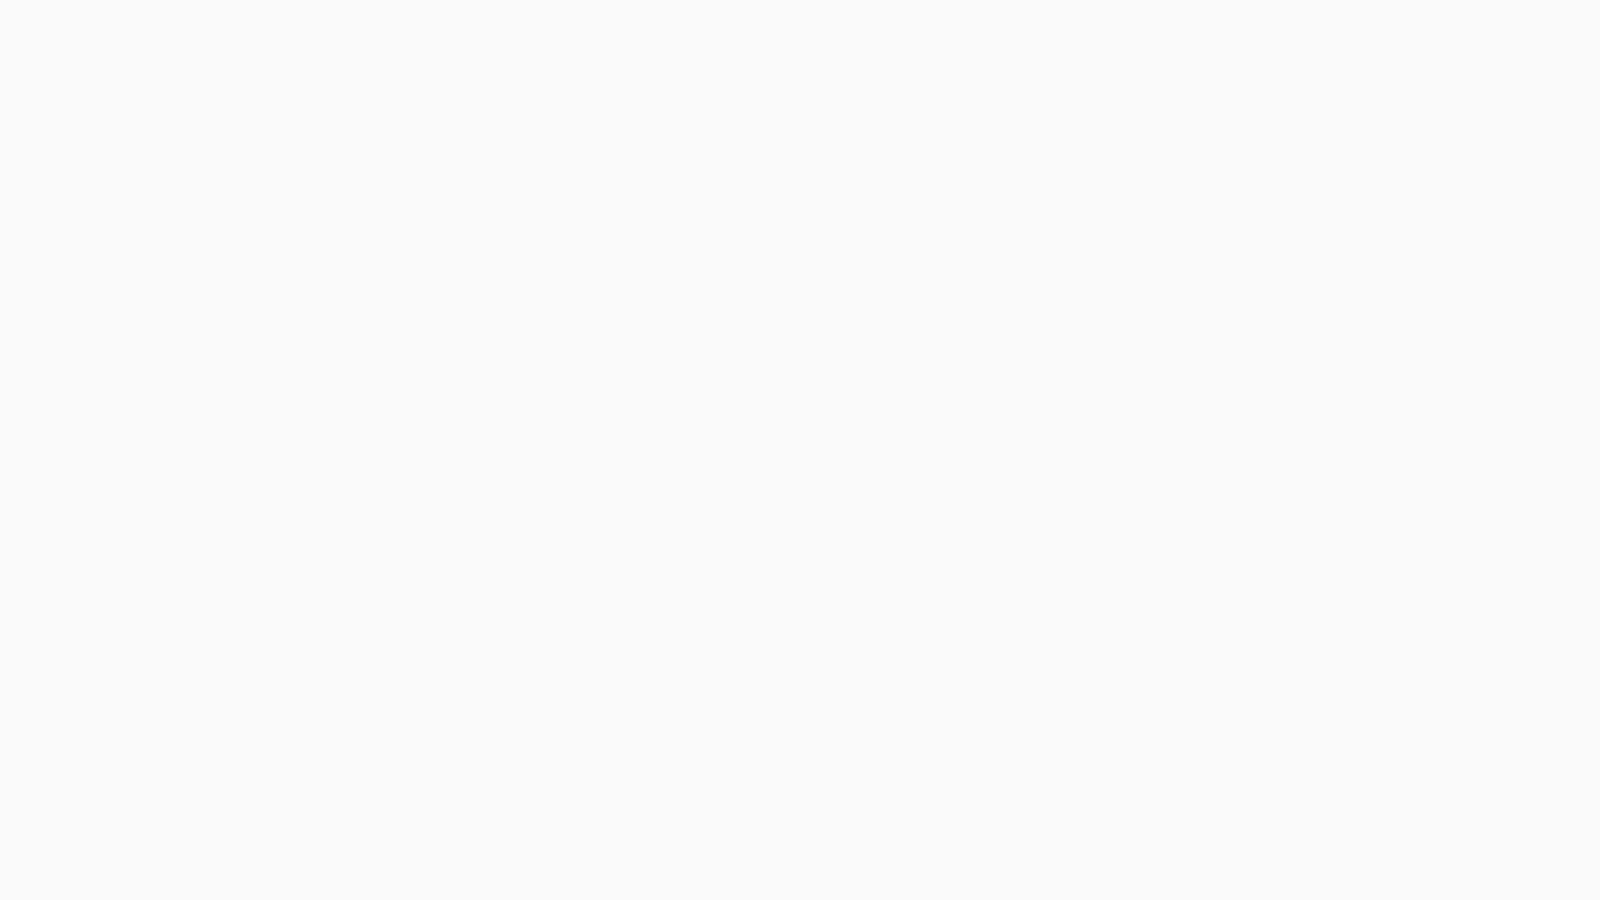

There is measurement-based quantum computation — rather than starting in a product state and creating entanglement, here we imagine starting with a highly entangled state of many qubits. Instead of using gates, the computation proceeds by performing sequences of measurements, one depending on the results of the former. The answer is encoded in the results of outcomes of the measurement.

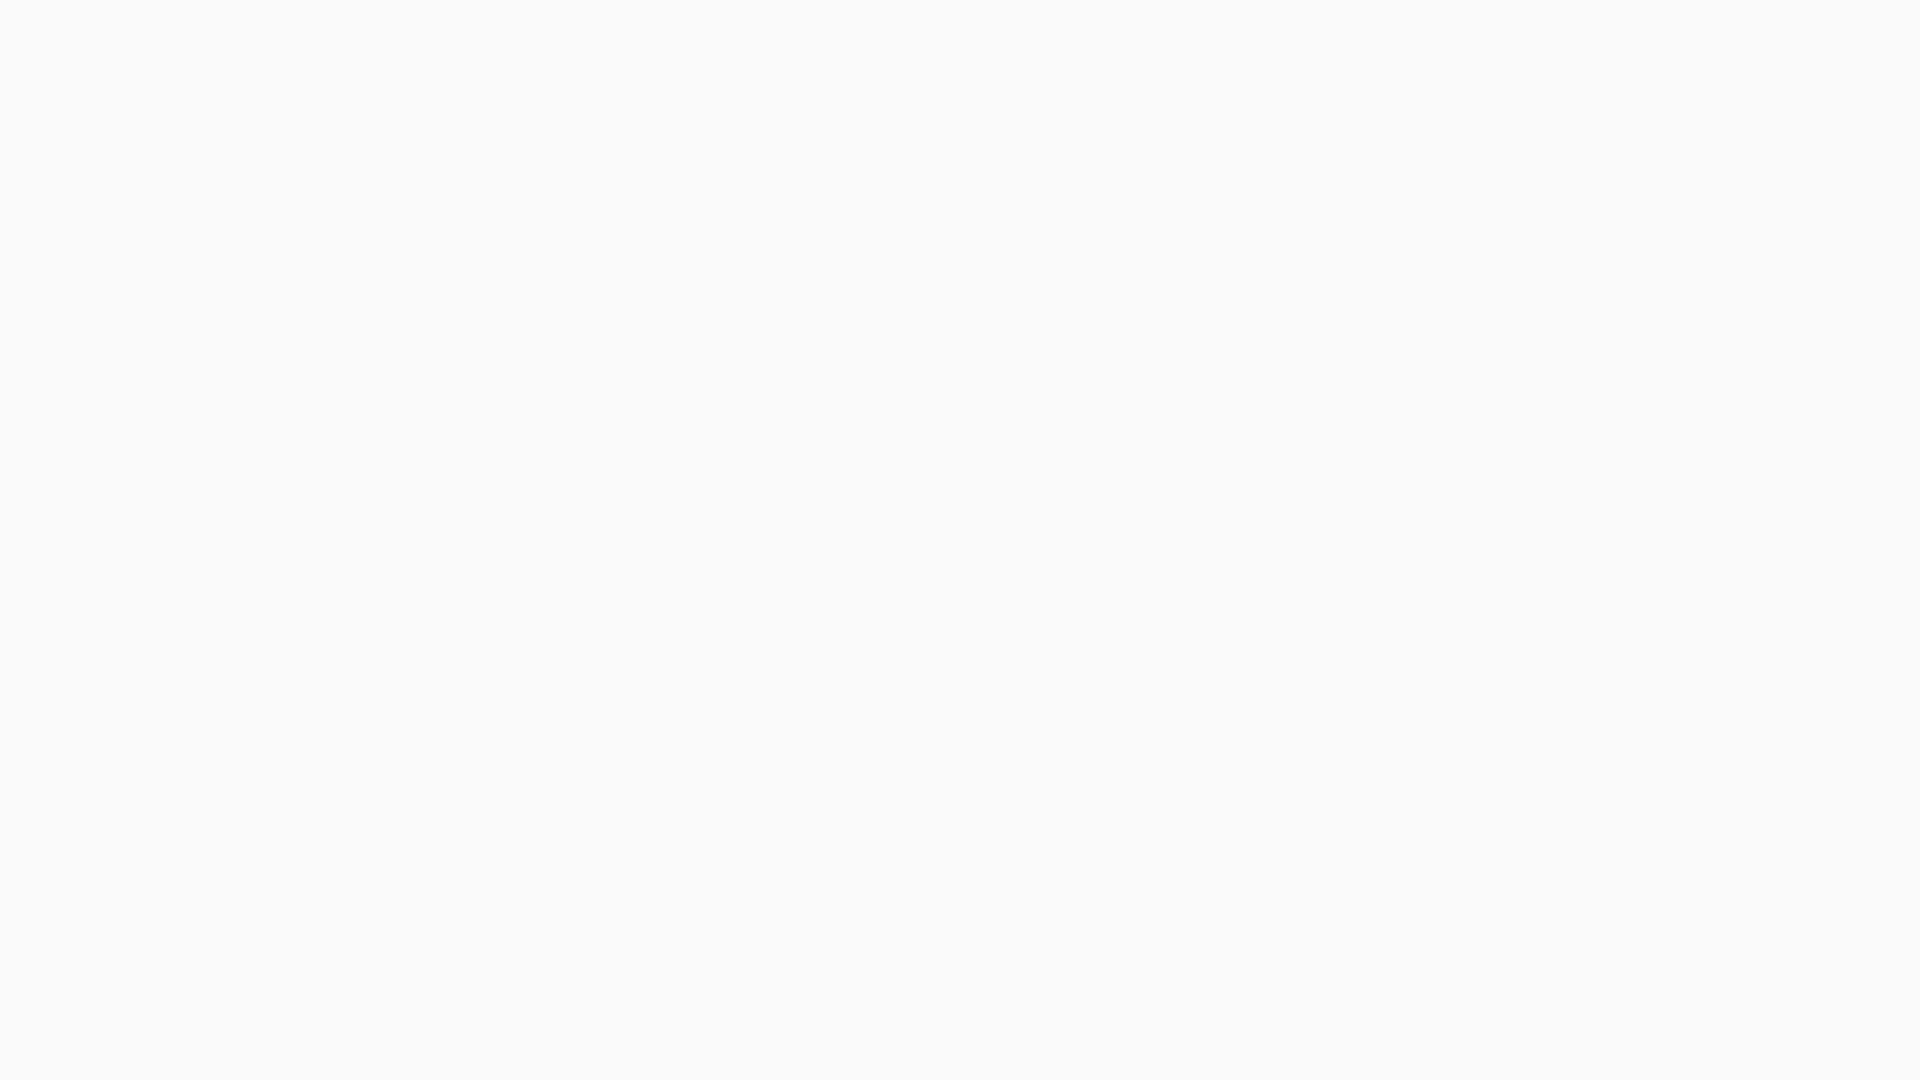

Unitary circuit model — this is the standard model and the one we have been discussing (though not in detail), which closely matches the digital circuit model of classical computation.

In addition to each of the above, there are finer-grained categories of quantum computation within each. One, within the unitary circuit model, can be phrased as the choice of gate set. A *gate set* is a small finite set of gates from which all others can be generated. You might think that the smallest gate set would be preferred, but it is not so simple. Smaller gate sets might require longer computations to reach a target, even if it is in principle possible. More importantly is the considerations of *error correction*. Some choices of gate sets are easier to error correct. Since we assume that error correction will play a crucial role in quantum computation, these gate sets are the most commonly considered. Error correction is also extremely interesting, but the details require some tools and will have to wait.

#These are not the gates you are looking for

Not every gate set is useful. Clearly, the gate set containing only the identity gate is useless, but others you might not be so sure about. Take, for example, the Hadamard gate.

In [ ]:
# create cirquit
circuit = qiskit.QuantumCircuit(5)

# apply Hadamard gate to every qubit
circuit.h((0,1,2,3,4))

print(circuit)

     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     ├───┤
q_4: ┤ H ├
     └───┘


Although this circuit generates superpositions (all of them in fact!), we can separately calculate what happens to each qubit. This requires, for $n$ qubits, only $n$ 2-dimensional vectors to be stored and manipulated. This would be true of any number of single-qubit gates. Clearly, then, to do something non-trivial we need entanglement. We showed last time that the CNOT gate generates entanglement. But this circuit, for example, only changes one computational basis state into another at each step.

In [ ]:
circuit = qiskit.QuantumCircuit()

q = qiskit.QuantumRegister(6, 'q')
c = qiskit.ClassicalRegister(6, 'c')

circuit.add_register(q)
circuit.add_register(c)

circuit.x(q[0])
circuit.x(q[1])
circuit.x(q[3])
circuit.x(q[5])
circuit.cx(q[1], q[2])
circuit.cx(q[3], q[5])
circuit.cx(q[0], q[1])
circuit.cx(q[2], q[3])
circuit.cx(q[5], q[4])
circuit.cx(q[2], q[0])
circuit.cx(q[3], q[5])
circuit.cx(q[0], q[1])
circuit.cx(q[4], q[2])
circuit.cx(q[1], q[0])
circuit.cx(q[3], q[5])
circuit.cx(q[0], q[5])
circuit.cx(q[4], q[1])
circuit.cx(q[2], q[4])
circuit.barrier()
circuit.measure(q[0], c[0])
circuit.measure(q[1], c[1])
circuit.measure(q[2], c[2])
circuit.measure(q[3], c[3])
circuit.measure(q[4], c[4])
circuit.measure(q[5], c[5])

print(circuit)

circuit.qasm(formatted = False, filename = 'qasm.qasm')
with open('qasm.qasm', 'r') as file:
    code = file.read()

code = code[:14] + code[(14 + 22):]

data = {
    'script': code,
    'count': 1,
    'state_vector': False
}

result = requests.post(req_str_qasm, json=data)
json_obj = json.loads(result.content)

bits = list(np.concatenate(list(json_obj['result'].values())).flat)


print("The Quokka returned the output:",bits)

     ┌───┐          ┌───┐     ┌───┐                ░ ┌─┐               
q_0: ┤ X ├───────■──┤ X ├──■──┤ X ├──■─────────────░─┤M├───────────────
     ├───┤     ┌─┴─┐└─┬─┘┌─┴─┐└─┬─┘  │  ┌───┐      ░ └╥┘┌─┐            
q_1: ┤ X ├──■──┤ X ├──┼──┤ X ├──■────┼──┤ X ├──────░──╫─┤M├────────────
     └───┘┌─┴─┐└───┘  │  ├───┤       │  └─┬─┘      ░  ║ └╥┘┌─┐         
q_2: ─────┤ X ├──■────■──┤ X ├───────┼────┼────■───░──╫──╫─┤M├─────────
     ┌───┐└───┘┌─┴─┐     └─┬─┘       │    │    │   ░  ║  ║ └╥┘┌─┐      
q_3: ┤ X ├──■──┤ X ├──■────┼────■────┼────┼────┼───░──╫──╫──╫─┤M├──────
     └───┘  │  ├───┤  │    │    │    │    │  ┌─┴─┐ ░  ║  ║  ║ └╥┘┌─┐   
q_4: ───────┼──┤ X ├──┼────■────┼────┼────■──┤ X ├─░──╫──╫──╫──╫─┤M├───
     ┌───┐┌─┴─┐└─┬─┘┌─┴─┐     ┌─┴─┐┌─┴─┐     └───┘ ░  ║  ║  ║  ║ └╥┘┌─┐
q_5: ┤ X ├┤ X ├──■──┤ X ├─────┤ X ├┤ X ├───────────░──╫──╫──╫──╫──╫─┤M├
     └───┘└───┘     └───┘     └───┘└───┘           ░  ║  ║  ║  ║  ║ └╥┘
c: 6/═════════════════════════════════════════════════╩══╩══╩══╩

It is a classical computation on the labels of the basis states. Not good enough! Putting the Hadamard and CNOT together generates superposition and entanglement. However, you’ll note something peculiar about a randomly chosen circuit of this type.

In [ ]:
circuit = qiskit.QuantumCircuit()

q = qiskit.QuantumRegister(6, 'q')
c = qiskit.ClassicalRegister(6, 'c')

circuit.add_register(q)
circuit.add_register(c)

circuit.x(q[0])
circuit.h(q[1])
circuit.x(q[1])
circuit.x(q[3])
circuit.h(q[3])
circuit.x(q[5])
circuit.cx(q[1], q[2])
circuit.h(q[2])
circuit.cx(q[3], q[5])
circuit.cx(q[0], q[1])
circuit.cx(q[2], q[3])
circuit.h(q[5])
circuit.cx(q[5], q[4])
circuit.cx(q[2], q[0])
circuit.cx(q[3], q[5])
circuit.cx(q[0], q[1])
circuit.cx(q[4], q[2])
circuit.cx(q[1], q[0])
circuit.cx(q[3], q[5])
circuit.h(q[1])
circuit.cx(q[0], q[5])
circuit.cx(q[4], q[1])
circuit.h(q[3])
circuit.cx(q[2], q[4])
circuit.barrier()
circuit.measure(q[0], c[0])
circuit.measure(q[1], c[1])
circuit.measure(q[2], c[2])
circuit.measure(q[3], c[3])
circuit.measure(q[4], c[4])
circuit.measure(q[5], c[5])

print(circuit)

circuit.qasm(formatted = False, filename = 'qasm.qasm')
with open('qasm.qasm', 'r') as file:
    code = file.read()

code = code[:14] + code[(14 + 22):]

data = {
    'script': code,
    'count': 1,
    'state_vector': False
}

result = requests.post(req_str_qasm, json=data)
json_obj = json.loads(result.content)

bits = list(np.concatenate(list(json_obj['result'].values())).flat)


print("The Quokka returned the output:",bits)

     ┌───┐                    ┌───┐     ┌───┐                     ░ ┌─┐      »
q_0: ┤ X ├────────────■───────┤ X ├──■──┤ X ├───────■─────────────░─┤M├──────»
     ├───┤┌───┐     ┌─┴─┐     └─┬─┘┌─┴─┐└─┬─┘┌───┐  │  ┌───┐      ░ └╥┘┌─┐   »
q_1: ┤ H ├┤ X ├──■──┤ X ├───────┼──┤ X ├──■──┤ H ├──┼──┤ X ├──────░──╫─┤M├───»
     └───┘└───┘┌─┴─┐├───┤       │  ├───┤     └───┘  │  └─┬─┘      ░  ║ └╥┘┌─┐»
q_2: ──────────┤ X ├┤ H ├──■────■──┤ X ├────────────┼────┼────■───░──╫──╫─┤M├»
     ┌───┐┌───┐└───┘└───┘┌─┴─┐     └─┬─┘     ┌───┐  │    │    │   ░  ║  ║ └╥┘»
q_3: ┤ X ├┤ H ├──■───────┤ X ├──■────┼────■──┤ H ├──┼────┼────┼───░──╫──╫──╫─»
     └───┘└───┘  │       ├───┤  │    │    │  └───┘  │    │  ┌─┴─┐ ░  ║  ║  ║ »
q_4: ────────────┼───────┤ X ├──┼────■────┼─────────┼────■──┤ X ├─░──╫──╫──╫─»
     ┌───┐     ┌─┴─┐┌───┐└─┬─┘┌─┴─┐     ┌─┴─┐     ┌─┴─┐     └───┘ ░  ║  ║  ║ »
q_5: ┤ X ├─────┤ X ├┤ H ├──■──┤ X ├─────┤ X ├─────┤ X ├───────────░──╫──╫──╫─»
     └───┘     └───┘└───┘     └───┘     └───┘     └─

You can only ever generate superposition with +1 or -1 in front of the basis states (ignoring the overall normalisation). There are definitely no complex numbers to be seen here. Oddly enough, if you add just two new single-qubit gates, you can generate any other unitary matrix, no matter how big!

#Mr. T gate

Surprisingly, gates on single qubits are the most important ones in many models of quantum computation. The gate set consisting of CNOT, Hadamard, and two different phase gates — called S and T — are enough to generate any other gate. That is, any computation — no matter how large — can be built up from a small set of one- and two-qubit gates!

$$
S = \pmatrix{1& 0\\0 & i},\; T = \pmatrix{1& 0\\0 & e^{i\frac\pi 4}}.
$$

If you recall we mentioned this fact when the Solovay-Kitaev theorem. One thing we have left out is that a finite set of gates cannot generate any gate perfectly since all unitaries form an uncountable set. The theorem shows that we can get arbitrarily close to any other gate with a number of elementary gates that grows very slowly in the accuracy we desire.

#Your first quantum primitive

Another important gate that we will use is called the Toffoli, or CCNOT (controlled-controlled-NOT), gate. The Toffoli can simulate the classical NAND gate. In fact, we can perform many logic operations on the binary labels of the computational basis.

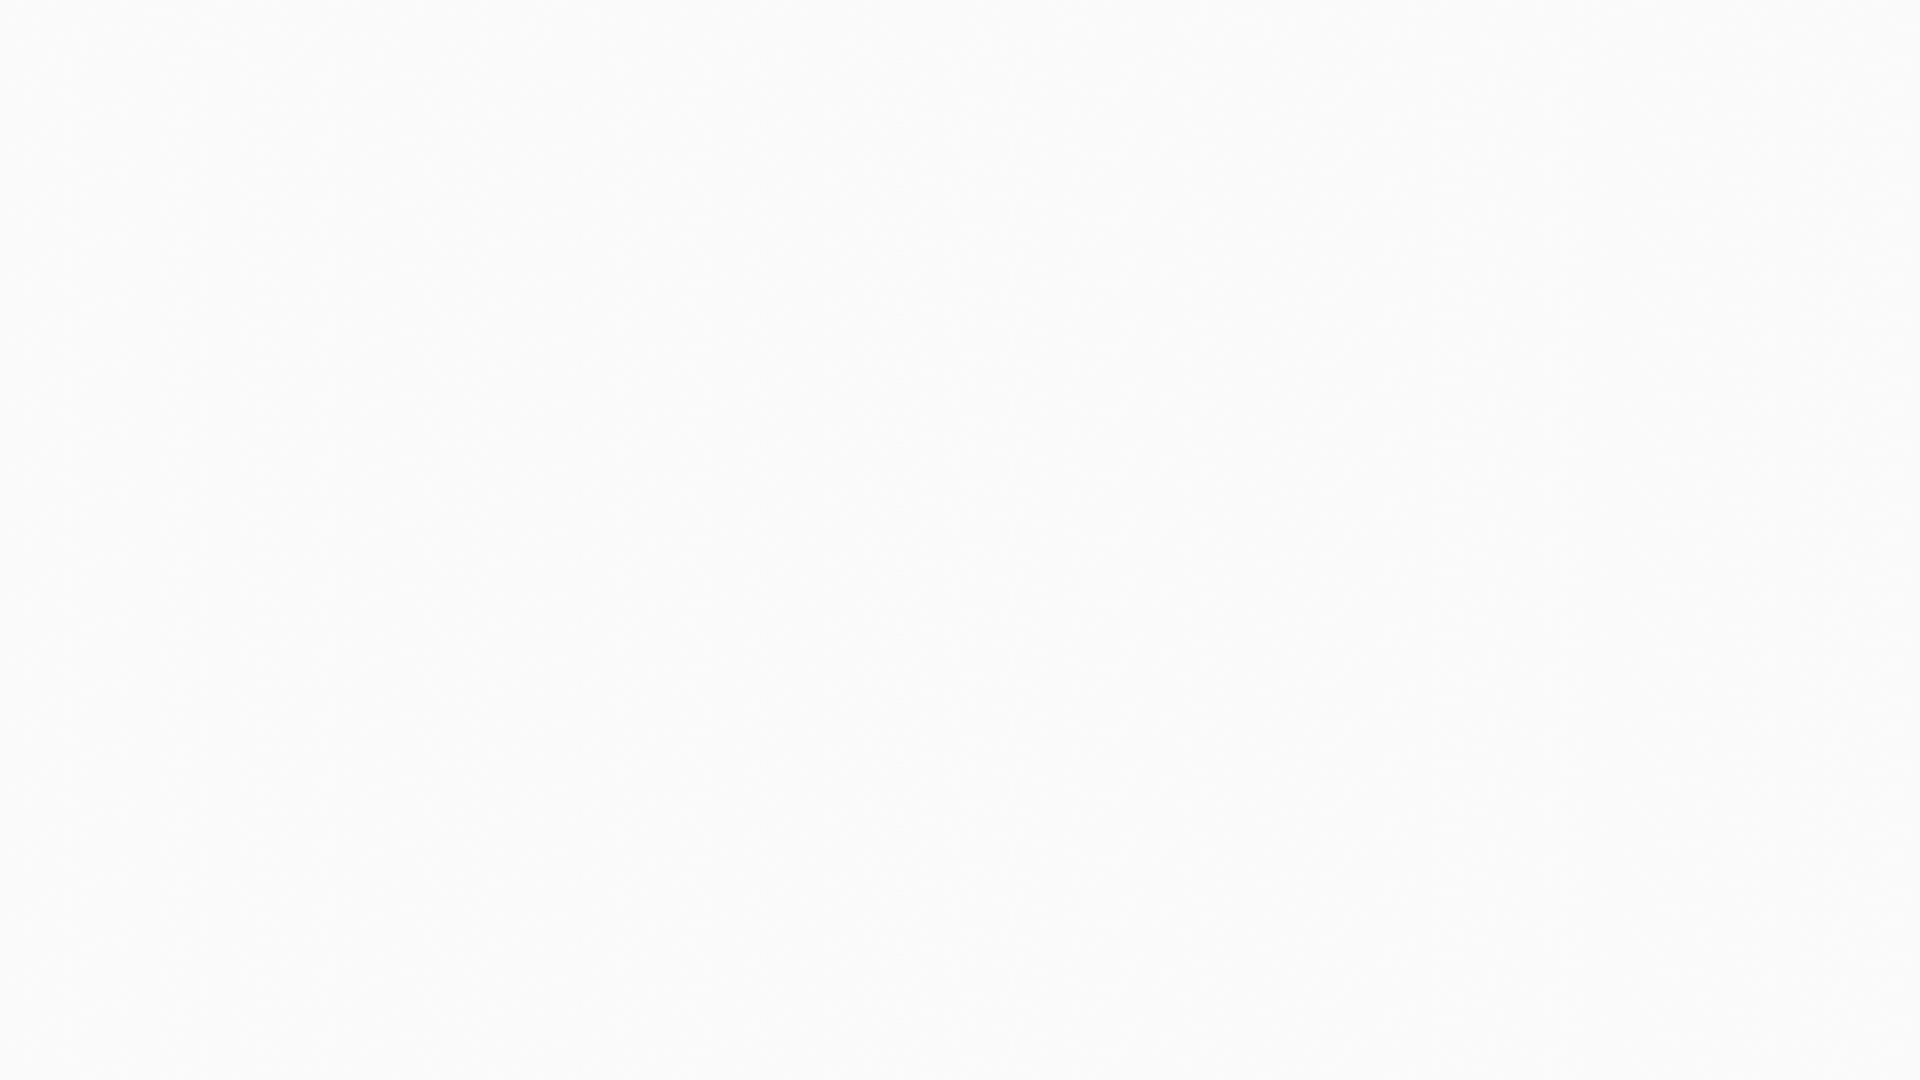

Since NAND is universal for classical computation, the Toffoli immediately shows that classical computing is contained within quantum computing. This 3 qubit gate can actually be implemented exactly with CNOT, Hadamards, and the T gate. It looks like this.

In [ ]:
circuit = qiskit.QuantumCircuit()

q = qiskit.QuantumRegister(3, 'q')

circuit.add_register(q)

circuit.x(q[0])
circuit.x(q[1])
circuit.h(q[2])
circuit.cx(q[1], q[2])
circuit.tdg(q[2])
circuit.cx(q[0], q[2])
circuit.t(q[2])
circuit.cx(q[1], q[2])
circuit.tdg(q[2])
circuit.cx(q[0], q[2])
circuit.t(q[1])
circuit.t(q[2])
circuit.cx(q[0], q[1])
circuit.h(q[2])
circuit.t(q[0])
circuit.tdg(q[1])
circuit.cx(q[0], q[1])

print(circuit)

     ┌───┐                                             ┌───┐      
q_0: ┤ X ├──────────────■─────────────────────■────■───┤ T ├───■──
     ├───┤              │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q_1: ┤ X ├──■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├
     ├───┤┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q_2: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├──────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘      


(You can also play a bit more interactively [here](https://algassert.com/quirk#circuit={%22cols%22:[[1,1,%22H%22],[1,%22%E2%80%A2%22,%22X%22],[1,1,%22Z^-%C2%BC%22],[%22%E2%80%A2%22,1,%22X%22],[1,1,%22Z^%C2%BC%22],[1,%22%E2%80%A2%22,%22X%22],[1,1,%22Z^-%C2%BC%22],[%22%E2%80%A2%22,1,%22X%22],[1,%22Z^%C2%BC%22,%22Z^%C2%BC%22],[%22%E2%80%A2%22,%22X%22],[%22Z^%C2%BC%22,%22Z^-%C2%BC%22,%22H%22],[%22%E2%80%A2%22,%22X%22]]}).)

Why does it look like that? Why do you need these weird phase gates? Well, one answer is, lots of guess work, trial-and-error, and some intuition from building and playing with circuits. Some idea of where the phase gates come from is the following equivalent [circuit](https://algassert.com/quirk#circuit=%7B%22cols%22:[[1,%22%E2%80%A2%22,%22X%5E%C2%BD%22],[%22%E2%80%A2%22,%22X%22],[1,%22%E2%80%A2%22,%22X%5E-%C2%BD%22],[%22%E2%80%A2%22,%22X%22],[%22%E2%80%A2%22,1,%22X%5E%C2%BD%22]]%7D) to the Toffoli.

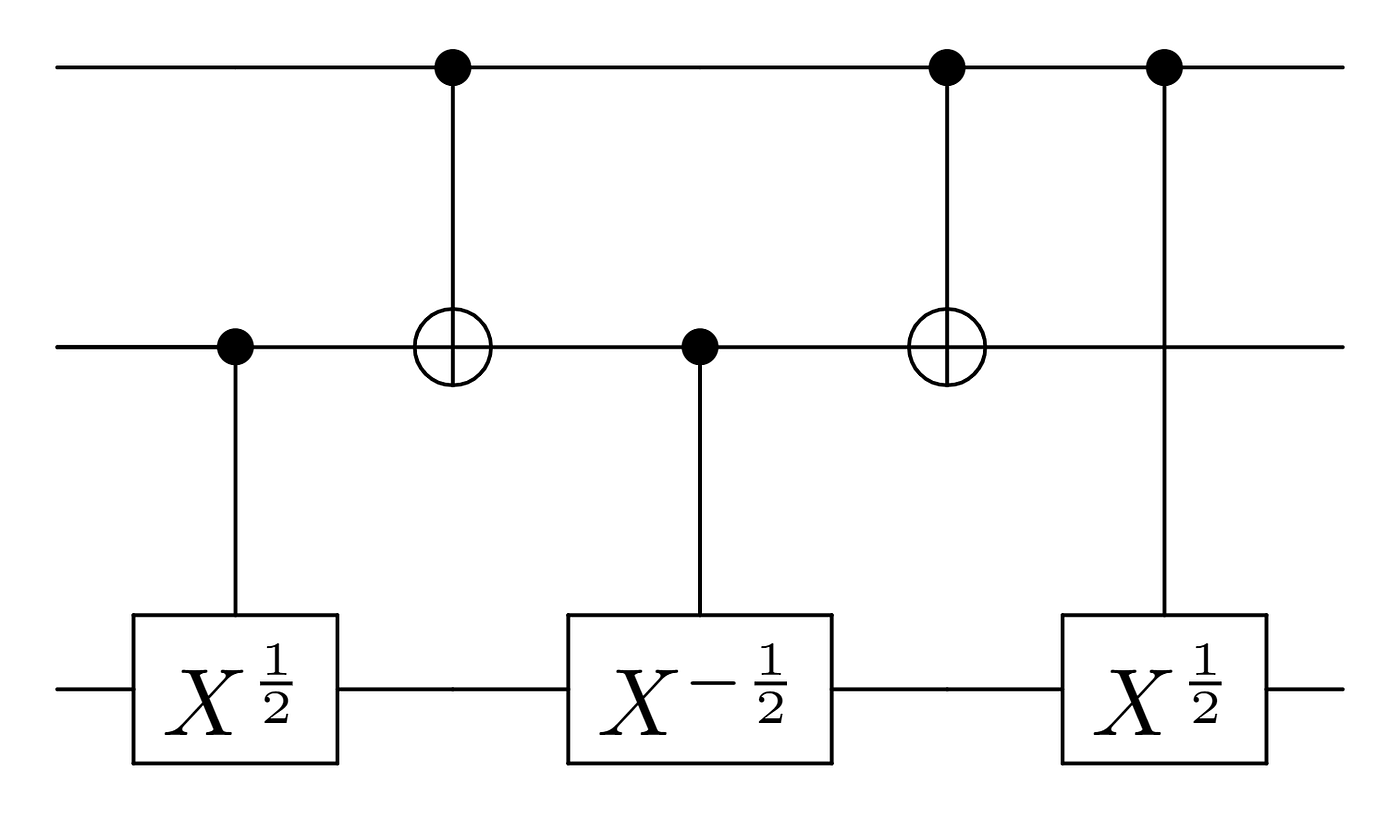

The first thing is to convince yourself that, by looking at all four combinations of bits on the first two registers, this is indeed equivalent to the Toffoli gate. The next thing to notice is that the “square-root-of-X” gate contains complex phases and these need to be implemented with some phase gate in addition to simple gates that do not introduce complex numbers.

#Cheaters never prosper

Now you have seen some primitive gates. You don’t really need to memorise them — most don’t. However, some are used so often that they are implicitly committed to memory. You can find many “cheat sheets” with the common gates, how they are drawn in circuit notation, and what their matrix representation looks like. For example, Wikipedia has a nice [table](https://en.wikipedia.org/wiki/Quantum_logic_gate#/media/File:Quantum_Logic_Gates.png). However, most don’t have the Dirac notation equivalent. Your homework is to modify this cheat sheet to create the Dirac-Rosetta stone by adding the Dirac notation representation of each gate.